In [4]:
import allel
import numpy as np
import pandas as pd
import subprocess
import datetime

In [5]:
import matplotlib.pyplot as plt

In [6]:
gene_df = pd.read_csv('../genes_df.csv')

In [3]:
## running ihs integrated haplotypes score
sbatch_path = "/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan"
batch_script_list = []

# Timestamp to keep files unique
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

for chr_num in range(1, 6):
    sbatch_filename = f"{sbatch_path}/sbatch_selscan_chr{chr_num}_{timestamp}_ihs.sh"
    log_filename = f"{sbatch_path}/selscan_chr{chr_num}_{timestamp}_ihs_output.txt"

    sbatch_command = f"""#!/bin/bash
#SBATCH --job-name="selscan_chr{chr_num}"
#SBATCH --time=24:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --output={log_filename}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {sbatch_path}
pwd
source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/gwas

echo "Running selscan iHS on chromosome {chr_num}..."

selscan --ihs \\
  --vcf modern_chr{chr_num}.vcf.gz \\
  --map selscan_chr{chr_num}.map \\
  --out selscan_chr{chr_num}_ihs \\
  --threads 4 \\
  --maf 0.05 \\
  --cutoff 0.05 \\
  --max-extend 1000000

echo "Done with chromosome {chr_num}"
"""

    # Save batch script
    with open(sbatch_filename, 'w') as f:
        f.write(sbatch_command)

    batch_script_list.append(sbatch_filename)


In [4]:
batch_script_list

['/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr1_20250715_134752_ihs.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr2_20250715_134752_ihs.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr3_20250715_134752_ihs.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr4_20250715_134752_ihs.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr5_20250715_134752_ihs.sh']

In [5]:
for i in range(len(batch_script_list)):
        subprocess.run(['sbatch', batch_script_list[i]])

Submitted batch job 68356
Submitted batch job 68357
Submitted batch job 68358
Submitted batch job 68359
Submitted batch job 68360


In [208]:
import datetime

# Base path
base_path = "/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan"
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

batch_script_list = []

# === iHH12 ===
for chr_num in range(1, 6):
    stat = "ihh12"
    script_name = f"{base_path}/sbatch_selscan_chr{chr_num}_{stat}_{timestamp}.sh"
    log_name = f"{base_path}/selscan_chr{chr_num}_{stat}_{timestamp}_output.txt"

    script = f"""#!/bin/bash
#SBATCH --job-name="selscan_chr{chr_num}_{stat}"
#SBATCH --time=4:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --output={log_name}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {base_path}
source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/gwas

echo "Running selscan {stat} on chromosome {chr_num}..."

selscan --ihh12 \\
  --vcf modern_chr{chr_num}.vcf.gz \\
  --map selscan_chr{chr_num}.map \\
  --out selscan_maf01_chr{chr_num}_{stat} \\
  --maf 0.01 \\
  --threads 4

echo "Done with chromosome {chr_num} - {stat}"
"""

    with open(script_name, 'w') as f:
        f.write(script)
    batch_script_list.append(script_name)

# === π (pi) ===
for chr_num in range(1, 6):
    stat = "pi"
    script_name = f"{base_path}/sbatch_selscan_chr{chr_num}_{stat}_{timestamp}.sh"
    log_name = f"{base_path}/selscan_chr{chr_num}_{stat}_{timestamp}_output.txt"

    script = f"""#!/bin/bash
#SBATCH --job-name="selscan_chr{chr_num}_{stat}"
#SBATCH --time=4:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --output={log_name}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {base_path}
source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/gwas

echo "Running selscan {stat} on chromosome {chr_num}..."

selscan --pi \\
  --vcf modern_chr{chr_num}.vcf.gz \\
  --map selscan_chr{chr_num}.map \\
  --pi-win 100 \\
  --maf 0.01 \\
  --out selscan_maf01_chr{chr_num}_{stat} \\
  --threads 4

echo "Done with chromosome {chr_num} - {stat}"
"""

    with open(script_name, 'w') as f:
        f.write(script)
    batch_script_list.append(script_name)


In [209]:
batch_script_list

['/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr1_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr2_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr3_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr4_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr5_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr1_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr2_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr3_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selsc

In [210]:
for i in range(len(batch_script_list)):
    subprocess.run(['sbatch', batch_script_list[i]])

Submitted batch job 68373
Submitted batch job 68374
Submitted batch job 68375
Submitted batch job 68376
Submitted batch job 68377
Submitted batch job 68378
Submitted batch job 68379
Submitted batch job 68380
Submitted batch job 68381
Submitted batch job 68382


Now compiling the results i noticed that i ran the programs per chromosome, and i gave 4 hs to each stat but ihs didnt finish, while ihh12 did finish and pi of course too, so im laucnhign again ihs with 24h per chrosomomes 

In [ ]:
# ihh12

In [21]:
import glob

# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihh12_out_files = glob.glob("selscan_maf01*ihh12*.out")

# Preview list
print(ihh12_out_files)

['selscan_maf01_chr4_ihh12.ihh12.out', 'selscan_maf01_chr5_ihh12.ihh12.out', 'selscan_maf01_chr3_ihh12.ihh12.out', 'selscan_maf01_chr2_ihh12.ihh12.out', 'selscan_maf01_chr1_ihh12.ihh12.out']


In [ ]:
### but first run the normalization 

# norm --ihh12 --files *.ihh12.out --bins 100
# norm --ihh12 --files selscan_maf01*.ihh12.out --bins 100


In [22]:
# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihh12_out_files = glob.glob("selscan_maf01*ihh12*.out.norm")

# Preview list
print(ihh12_out_files)

['selscan_maf01_chr1_ihh12.ihh12.out.norm', 'selscan_maf01_chr3_ihh12.ihh12.out.norm', 'selscan_maf01_chr5_ihh12.ihh12.out.norm', 'selscan_maf01_chr2_ihh12.ihh12.out.norm', 'selscan_maf01_chr4_ihh12.ihh12.out.norm']


In [23]:
import pandas as pd

# Read and concatenate them
dfs = []
for f in ihh12_out_files:
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    
    # Optionally add a chromosome identifier if needed
    chrom_num = f.split('_chr')[1].split('_')[0]
    df['chrom'] = int(chrom_num)
    
    dfs.append(df)

# Combine into one DataFrame
ihh12_df = pd.concat(dfs, ignore_index=True)


/tmp/ipykernel_2696783/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_2696783/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_2696783/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_2696783/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_2696783/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)


In [24]:
ihh12_df

,0,1,2,3,4,5,chrom
0,.,43171,0.259259,5.241730e-09,normxpehh,crit,1
1,.,43494,0.047619,5.287350e-09,-0.314855,0,1
2,.,43795,0.105820,5.290560e-09,-0.314855,0,1
3,.,43804,0.079365,5.434660e-09,-0.314855,0,1
4,.,44228,0.079365,5.434660e-09,-0.314855,0,1
...,...,...,...,...,...,...,...
1079863,.,18580614,0.026455,0.000000e+00,-0.314855,0,4
1079864,.,18580707,0.015873,0.000000e+00,-0.314855,0,4
1079865,.,18580930,0.031746,0.000000e+00,-0.314855,0,4
1079866,.,18580941,0.095238,0.000000e+00,-0.314855,0,4


In [25]:
ihh12_df.columns = ['locus', 'pos', 'freq', 'ihh12_raw', 'ihh12_norm', 'crit','chrom' ]

In [26]:
index_to_drop = ihh12_df[ihh12_df['ihh12_norm'] == 'normxpehh'].index

In [27]:
ihh12_df = ihh12_df.drop(index_to_drop).reset_index(drop=True)

In [28]:
ihh12_df['ihh12_norm'] = ihh12_df['ihh12_norm'].astype(float)

In [29]:
# Sort by chromosome and position
ihh12_df = ihh12_df.sort_values(["chrom", "pos"])

# Compute cumulative basepair position for plotting
chrom_offsets = ihh12_df.groupby("chrom")["pos"].max().cumsum().shift(fill_value=0)
ihh12_df["pos_cum"] = ihh12_df.apply(lambda  row: row["pos"] + chrom_offsets[row["chrom"]], axis=1)

In [1]:
gene_df = pd.read_csv('../genes_df.csv')

NameError: name 'pd' is not defined

In [31]:
df = ihh12_df.copy()

In [33]:
df.head()

,locus,pos,freq,ihh12_raw,ihh12_norm,crit,chrom,pos_cum
0,.,43494,0.047619,5.287350e-09,-0.314855,0,1,43494
1,.,43795,0.105820,5.290560e-09,-0.314855,0,1,43795
2,.,43804,0.079365,5.434660e-09,-0.314855,0,1,43804
3,.,44228,0.079365,5.434660e-09,-0.314855,0,1,44228
4,.,44389,0.063492,5.434660e-09,-0.314855,0,1,44389


In [65]:
#df = df.sample(frac = .7)

ValueError: a must be greater than 0 unless no samples are taken

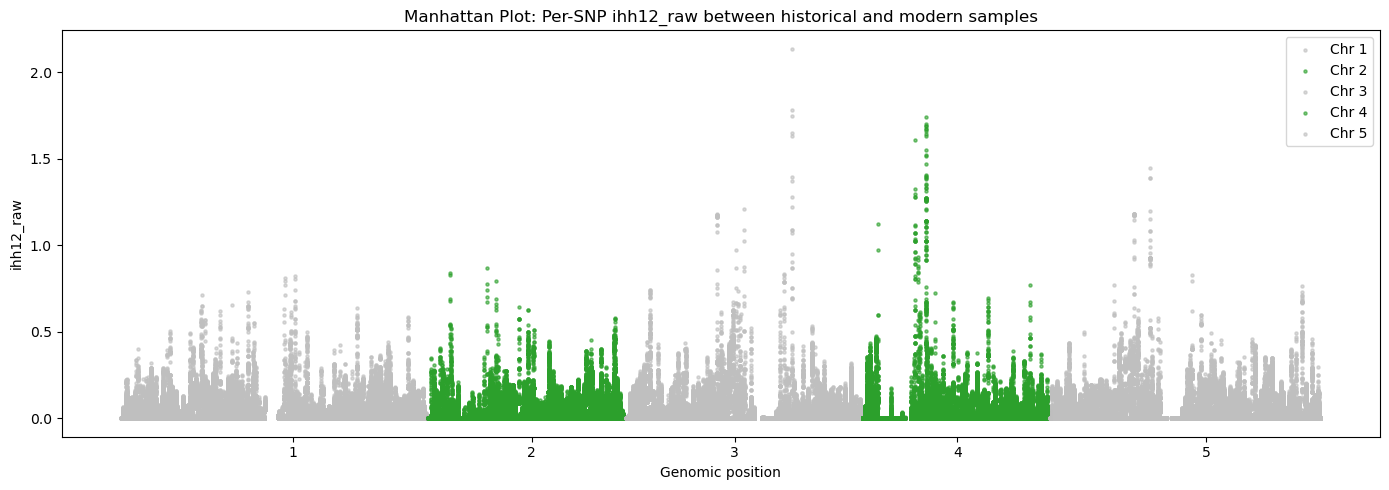

In [32]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['ihh12_norm'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 


# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('ihh12_raw')
plt.title('Manhattan Plot: Per-SNP ihh12_raw between historical and modern samples')
plt.legend()
plt.tight_layout()

# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = str(row['chrom'])
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['ihh12_norm'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

In [112]:
df = df.sample(frac = .5)

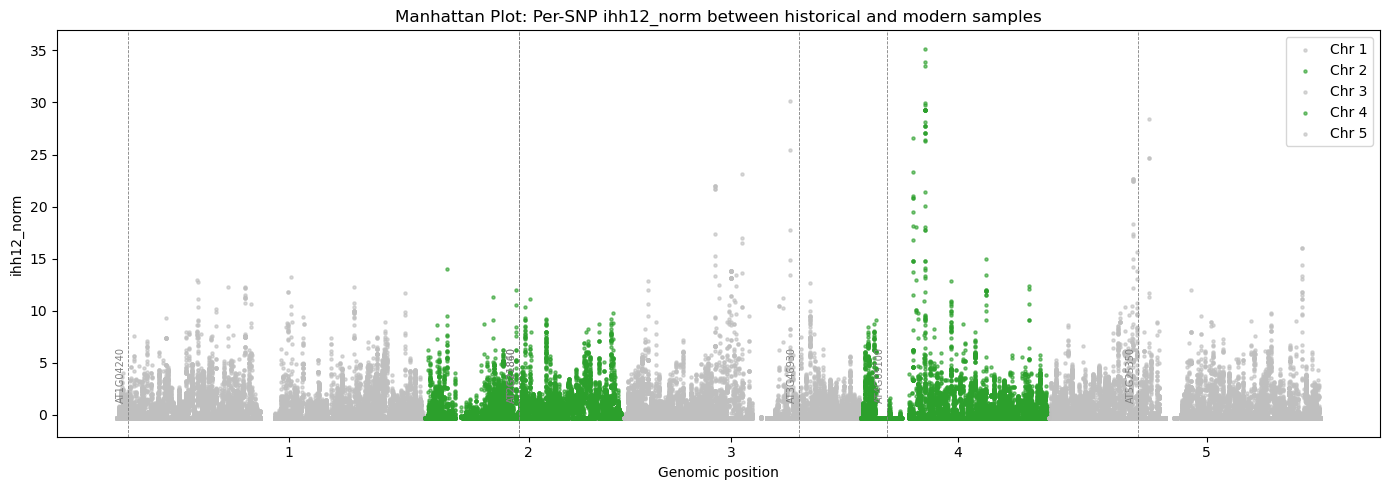

In [115]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['ihh12_norm'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 


# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('ihh12_norm')
plt.title('Manhattan Plot: Per-SNP ihh12_norm between historical and modern samples')
plt.legend()
plt.tight_layout()

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['ihh12_raw'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

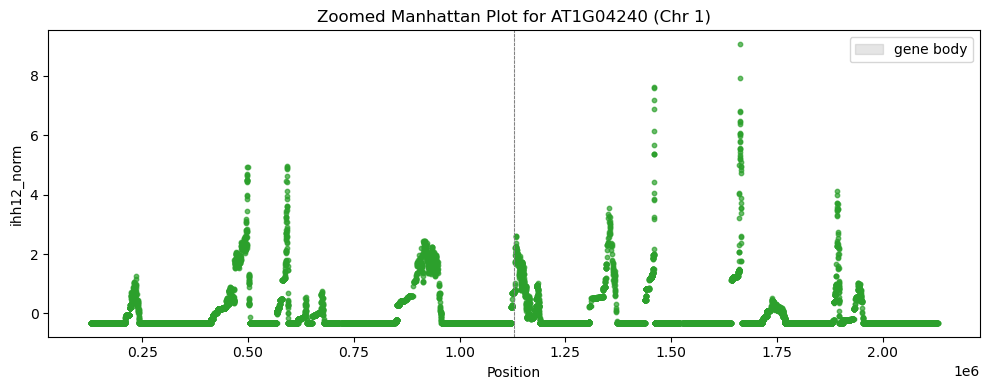

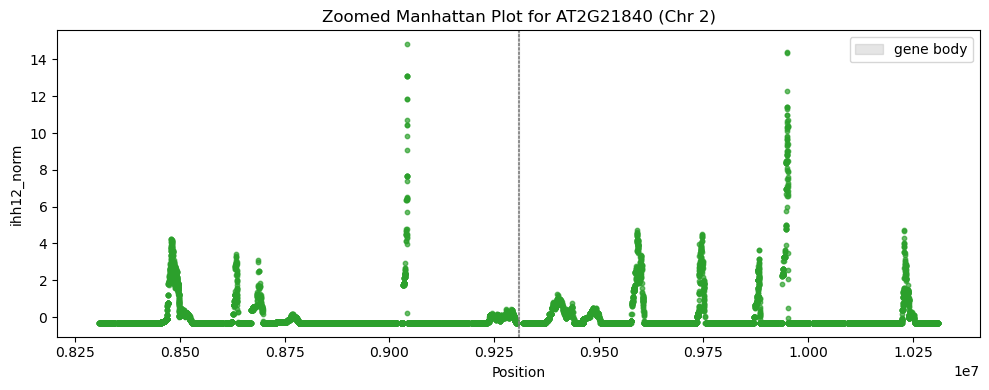

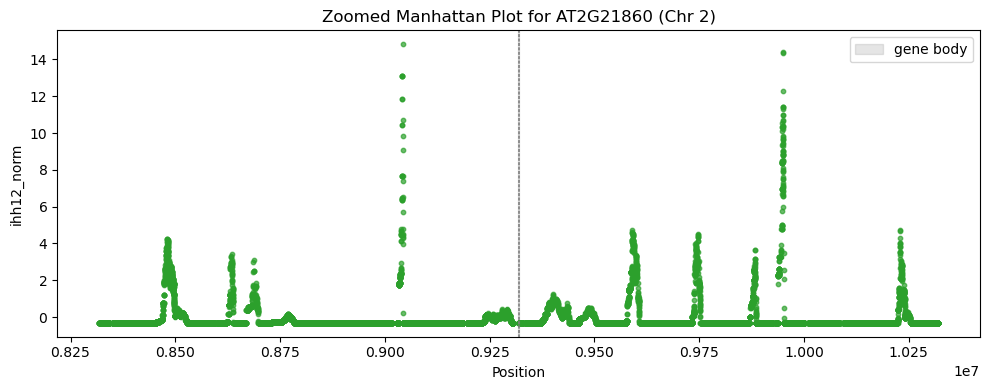

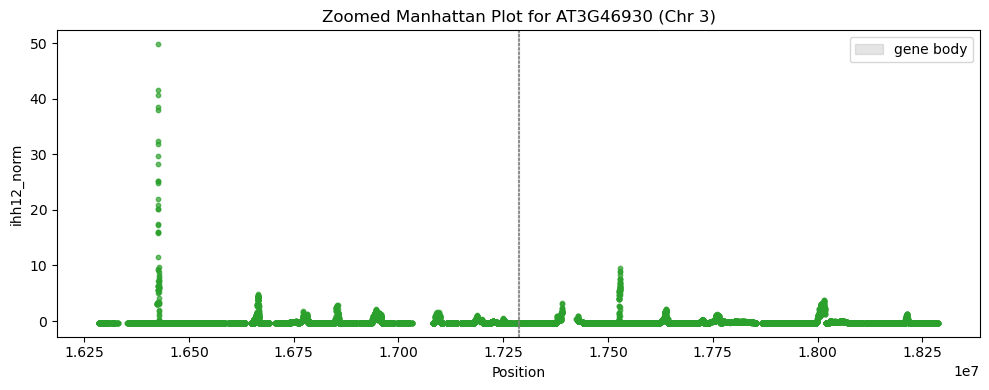

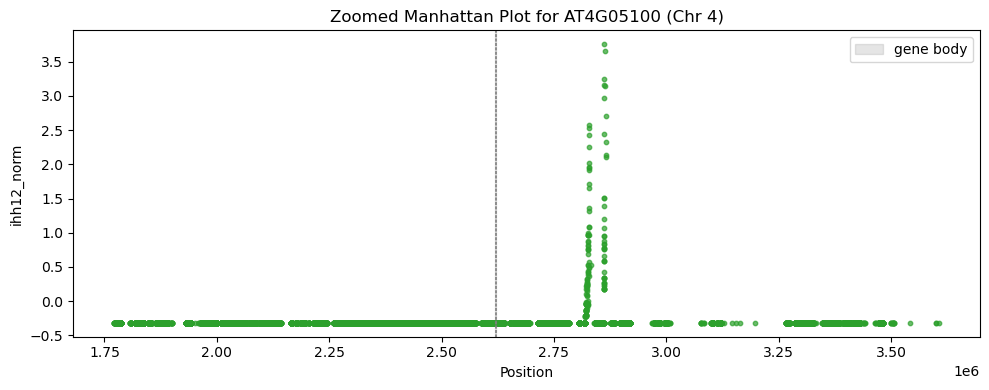

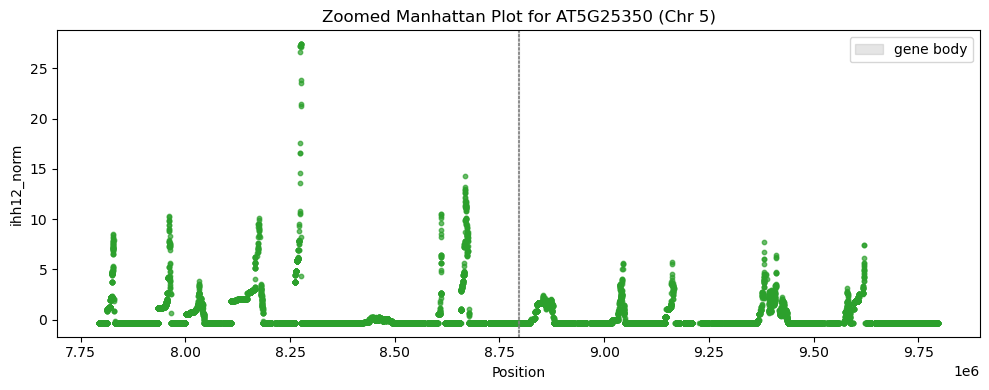

In [34]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['pos'] >= gene_start - 1000000) & (df['pos'] <= gene_end + 1000000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['pos'], region_df['ihh12_norm'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('ihh12_norm')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
## noiw ihs

In [65]:
import glob

# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihs_out_files = glob.glob("selscan_*ihs*.out")

# Preview list
print(ihs_out_files)

['selscan_chr5_ihs.ihs.out', 'selscan_chr1_ihs.ihs.out', 'selscan_chr3_ihs.ihs.out', 'selscan_chr2_ihs.ihs.out', 'selscan_chr4_ihs.ihs.out']


In [ ]:
### but first run the normalization 

# norm --ihs --files *.ihs.out --bins 100


In [71]:
# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihs_out_files = glob.glob("*ihs.out.100bins.norm")

# Preview list
print(ihs_out_files)

['selscan_chr3_ihs.ihs.out.100bins.norm', 'selscan_chr2_ihs.ihs.out.100bins.norm', 'selscan_chr1_ihs.ihs.out.100bins.norm', 'selscan_chr4_ihs.ihs.out.100bins.norm', 'selscan_chr5_ihs.ihs.out.100bins.norm']


In [72]:
import pandas as pd

# Read and concatenate them
dfs = []
for f in ihs_out_files:
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    
    # Optionally add a chromosome identifier if needed
    chrom_num = f.split('_chr')[1].split('_')[0]
    df['chrom'] = int(chrom_num)
    
    dfs.append(df)

# Combine into one DataFrame
ihs_df = pd.concat(dfs, ignore_index=True)


In [76]:
ihs_df

,0,1,2,3,4,5,6,7,chrom
0,.,127998,0.423280,4.354560e-11,1.076520e-09,-3.207680,-0.713363,0,3
1,.,132891,0.470899,1.863600e-09,7.105570e-09,-1.338370,-0.295886,0,3
2,.,140215,0.417989,2.803730e-09,6.924140e-09,-0.904062,-0.495697,0,3
3,.,143643,0.058201,4.909920e-02,2.120730e-10,19.260200,1.363640,0,3
4,.,147606,0.063492,4.335250e-02,2.148900e-10,19.122500,1.404950,0,3
...,...,...,...,...,...,...,...,...,...
444435,.,26722729,0.068783,1.558460e-03,2.226100e-07,8.853790,-0.121895,0,5
444436,.,26724023,0.063492,1.730660e-03,1.587160e-07,9.296900,-0.056009,0,5
444437,.,26725650,0.063492,1.730660e-03,1.491690e-07,9.358930,-0.046786,0,5
444438,.,26730223,0.089947,2.386910e-02,1.498020e-07,11.978800,0.447094,0,5


In [80]:
ihs_df.columns = ['id',
    "pos",             # 0
    "freq_derived",         # 1
    "iHH_ancestral",        # 2
    "iHH_derived",          # 3
    "unstandardized_iHS",   # 4
    "iHS",                  # 5
    "flag",                # 6          # 7
    "chrom"                 # 8
]

In [79]:
ihs_df.dtypes

id                     object
position                int64
freq_derived          float64
iHH_ancestral         float64
iHH_derived           float64
unstandardized_iHS    float64
iHS                   float64
flag                    int64
chrom                   int64
dtype: object

In [26]:
#index_to_drop = ihs_df[ihs_df['ihh12_norm'] == 'normxpehh'].index

In [27]:
#ihh12_df = ihh12_df.drop(index_to_drop).reset_index(drop=True)

In [28]:
#ihh12_df['ihh12_norm'] = ihh12_df['ihh12_norm'].astype(float)

In [83]:
# Sort by chromosome and position
ihs_df = ihs_df.sort_values(["chrom", "pos"])

# Compute cumulative basepair position for plotting
chrom_offsets = ihs_df.groupby("chrom")["pos"].max().cumsum().shift(fill_value=0)
ihs_df["pos_cum"] = ihs_df.apply(lambda  row: row["pos"] + chrom_offsets[row["chrom"]], axis=1)

In [3]:
gene_df = pd.read_csv('../genes_df.csv')

In [4]:
gene_df

,gene_id,chrom,start,end,length
0,AT1G04240,1,1128149,1129689,1540
1,AT2G21840,2,9307024,9310358,3334
2,AT2G21860,2,9318122,9320024,1902
3,AT3G46930,3,17285565,17288077,2512
4,AT4G05100,4,2618372,2619947,1575
5,AT5G25350,5,8794252,8797349,3097


In [85]:
df = ihs_df.copy()

In [86]:
df.head()

,id,pos,freq_derived,iHH_ancestral,iHH_derived,unstandardized_iHS,iHS,flag,chrom,pos_cum
146367,.,75899,0.312169,4.374030e-08,4.660720e-08,-0.063486,-0.642148,0,1,75899
146368,.,78265,0.301587,4.773020e-08,4.620560e-08,0.032463,-0.652321,0,1,78265
146369,.,100501,0.370370,5.737940e-08,5.614400e-08,0.021765,-0.406395,0,1,100501
146370,.,105788,0.174603,7.003540e-08,5.058270e-08,0.325392,-0.987867,0,1,105788
146371,.,107727,0.169312,5.853340e-08,4.867540e-08,0.184425,-1.014880,0,1,107727


In [65]:
#df = df.sample(frac = .7)

/tmp/ipykernel_2696783/3712119987.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


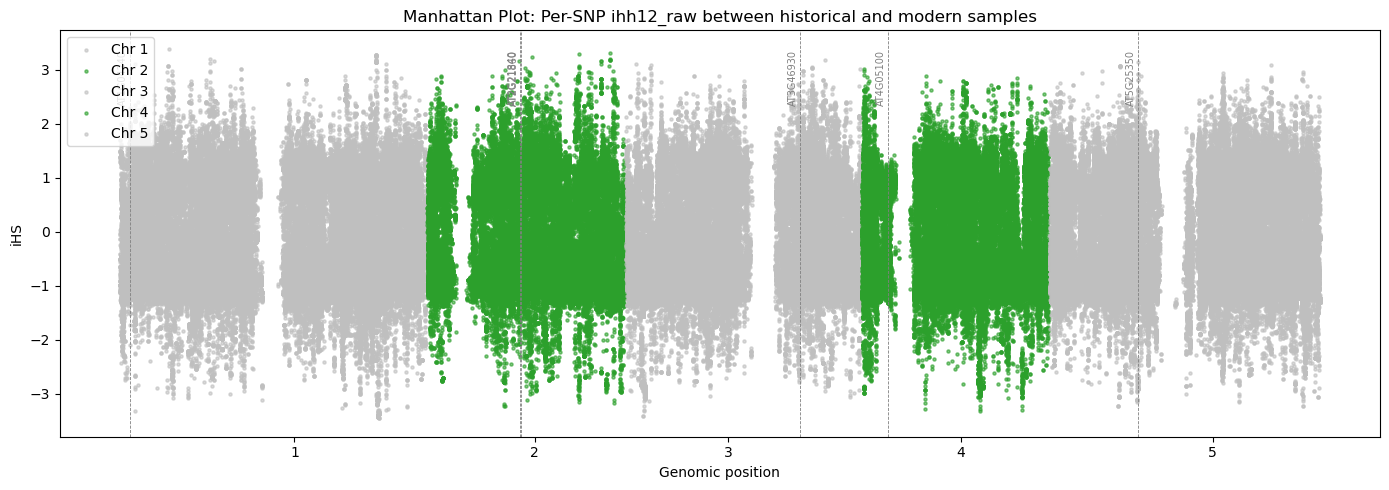

In [89]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['iHS'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 


# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('iHS')
plt.title('Manhattan Plot: Per-SNP ihh12_raw between historical and modern samples')
plt.legend()
plt.tight_layout()

# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    # Compute gene center
    gene_center = (gene_start + gene_ends) // 2

    # Subset df by chromosome
    subset = df[df['chrom'] == chrom]

    # Find the nearest position to the gene center
    nearest_idx = (subset['pos'] - gene_center).abs().idxmin()
    gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']

    # Plot vertical line at gene
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['iHS'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()

In [112]:
#df = df.sample(frac = .5)

In [ ]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['iHS'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 


# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('iHS')
plt.title('Manhattan Plot: Per-SNP iHS_norm between historical and modern samples')
plt.legend()
plt.tight_layout()

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['iHS'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

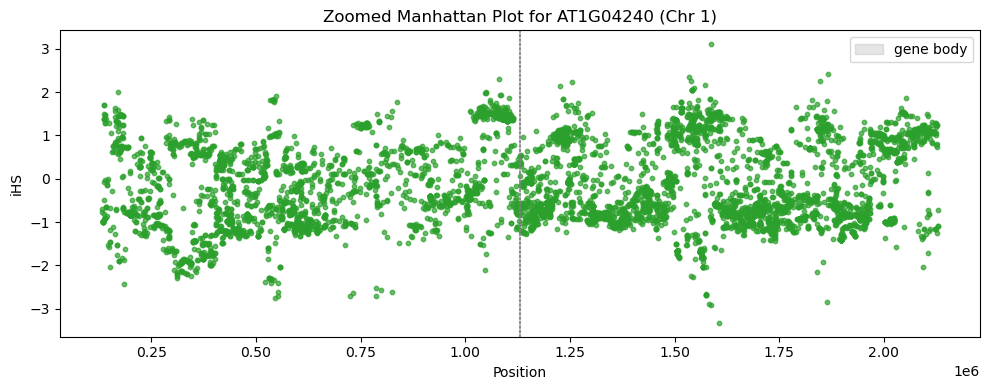

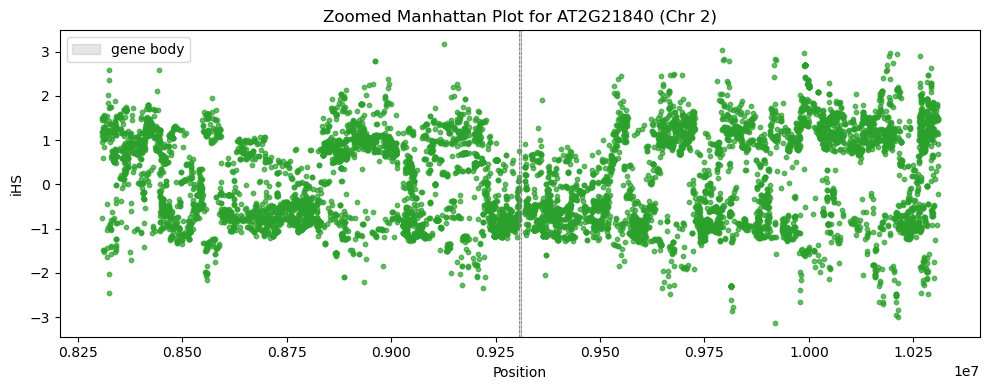

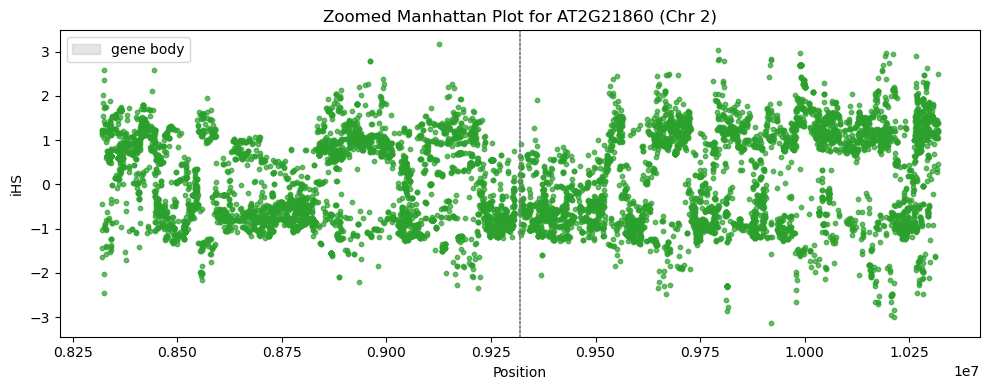

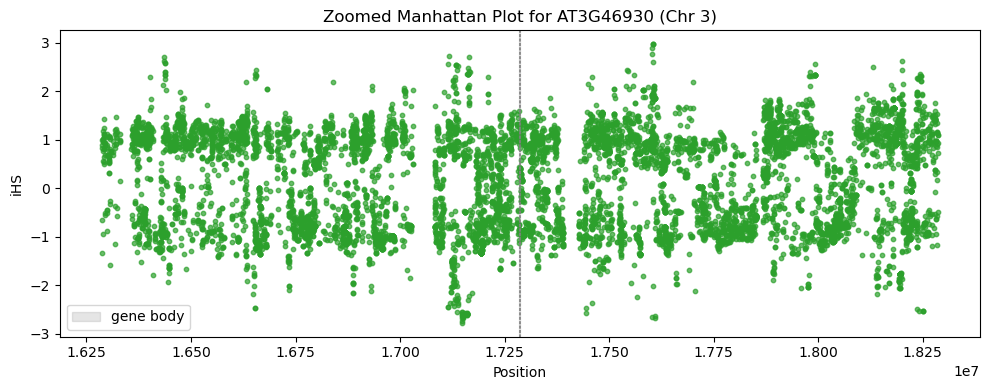

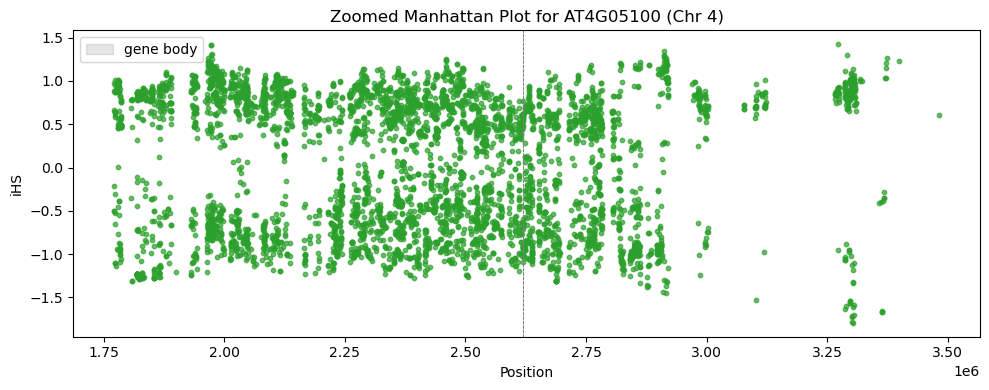

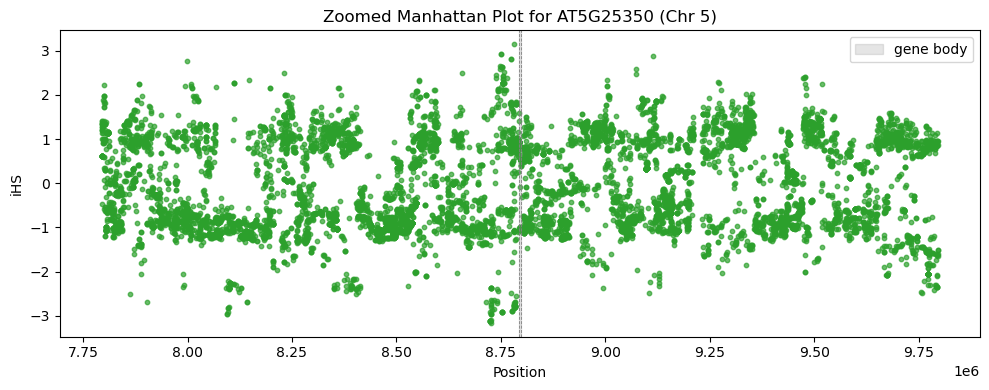

In [91]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['pos'] >= gene_start - 1000000) & (df['pos'] <= gene_end + 1000000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['pos'], region_df['iHS'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('iHS')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [36]:
import glob

# Get all files in the current directory that contain 'ihh12' and end in '.out'
pi_out_files = glob.glob("selscan_maf01*pi.100bp.out")

# Preview list
print(pi_out_files)

['selscan_maf01_chr5_pi.pi.100bp.out', 'selscan_maf01_chr4_pi.pi.100bp.out', 'selscan_maf01_chr2_pi.pi.100bp.out', 'selscan_maf01_chr3_pi.pi.100bp.out', 'selscan_maf01_chr1_pi.pi.100bp.out']


In [37]:
pi_out_files

['selscan_maf01_chr5_pi.pi.100bp.out',
 'selscan_maf01_chr4_pi.pi.100bp.out',
 'selscan_maf01_chr2_pi.pi.100bp.out',
 'selscan_maf01_chr3_pi.pi.100bp.out',
 'selscan_maf01_chr1_pi.pi.100bp.out']

In [38]:
import pandas as pd



# Read and concatenate them
dfs = []
for f in pi_out_files:
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    
    # Optionally add a chromosome identifier if needed
    chrom_num = f.split('_chr')[1].split('_')[0]
    df['chrom'] = int(chrom_num)
    
    dfs.append(df)

# Combine into one DataFrame
pi_df = pd.concat(dfs, ignore_index=True)


In [39]:
pi_df.columns = ['window_start', 'window_end', 'pi', 'chrom']

In [40]:
pi_df.dtypes

window_start      int64
window_end        int64
pi              float64
chrom             int64
dtype: object

In [41]:
# First, sort by chromosome and window_start
pi_df = pi_df.sort_values(['chrom', 'window_start'])

# Get chromosome lengths
chrom_max = pi_df.groupby('chrom')['window_end'].max().sort_index()

# Compute chromosome offsets
chrom_offsets = chrom_max.cumsum() - chrom_max
offset_dict = chrom_offsets.to_dict()

# Apply offset
pi_df['pos_cum'] = pi_df.apply(lambda row: row['window_start'] + offset_dict[row['chrom']], axis=1)


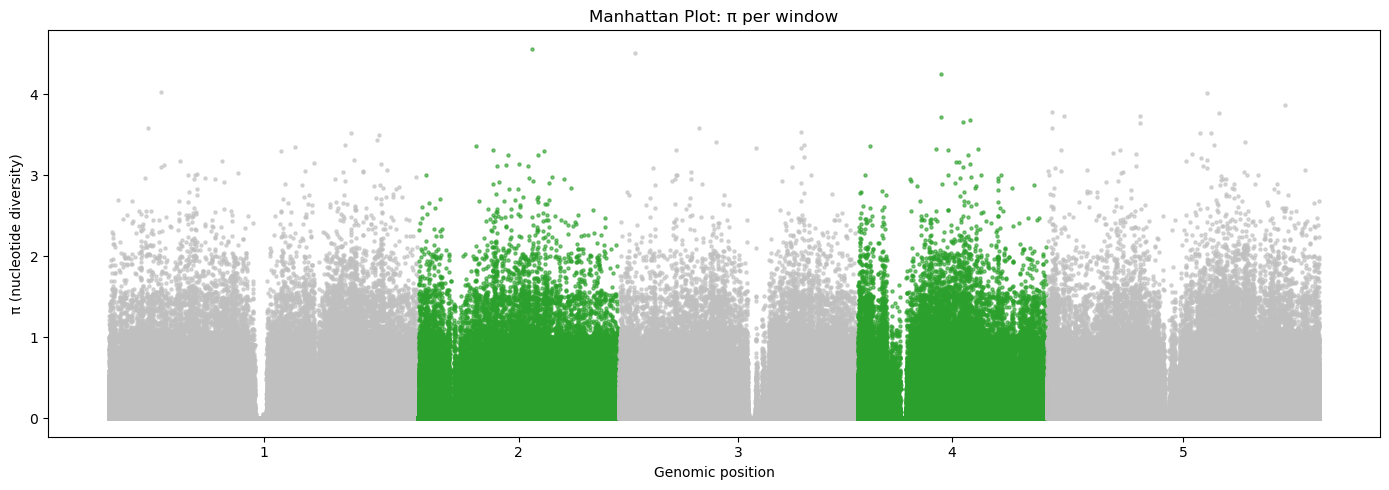

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(pi_df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['pi'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')

# Chromosome tick labels
xticks = pi_df.groupby('chrom')['pos_cum'].median()
xtick_labels = pi_df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('π (nucleotide diversity)')
plt.title('Manhattan Plot: π per window')
plt.legend().remove()
plt.tight_layout()
plt.show()


In [44]:
df

,0,1,2,chrom
0,1,100,0.000000,1
1,101,200,0.000000,1
2,201,300,0.000000,1
3,301,400,0.594052,1
4,401,500,0.181326,1
...,...,...,...,...
304178,30417801,30417900,0.143264,1
304179,30417901,30418000,0.111939,1
304180,30418001,30418100,0.000000,1
304181,30418101,30418200,0.000000,1


In [212]:
gene_df

,gene_id,chrom,start,end,length
0,AT1G04240,1,1128149,1129689,1540
1,AT2G21840,2,9307024,9310358,3334
2,AT2G21860,2,9318122,9320024,1902
3,AT3G46930,3,17285565,17288077,2512
4,AT4G05100,4,2618372,2619947,1575
5,AT5G25350,5,8794252,8797349,3097


In [58]:
from scipy.stats import zscore
pi_df['pi_z'] = zscore(pi_df['pi'])

In [92]:
pi_df

,window_start,window_end,pi,chrom,pos_cum,pi_z
885325,1,100,0.000000,1,1.0,-0.510376
885326,101,200,0.000000,1,101.0,-0.510376
885327,201,300,0.000000,1,201.0,-0.510376
885328,301,400,0.594052,1,301.0,1.725342
885329,401,500,0.181326,1,401.0,0.172046
...,...,...,...,...,...,...
267903,26790301,26790400,0.072643,5,118950301.0,-0.236985
267904,26790401,26790500,0.932340,5,118950401.0,2.998491
267905,26790501,26790600,0.000000,5,118950501.0,-0.510376
267906,26790601,26790700,0.000000,5,118950601.0,-0.510376


/tmp/ipykernel_2696783/671513031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2
/tmp/ipykernel_2696783/671513031.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['distance'] = region_df['pos'] - gene_center
/tmp/ipykernel_2696783/671513031.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

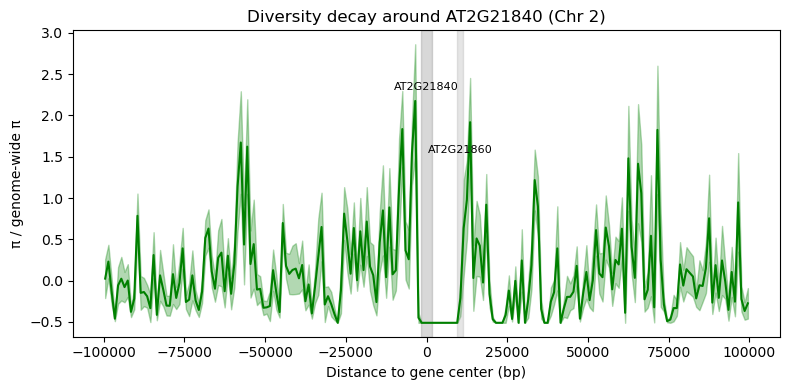

In [59]:
chrom = 2
gene_start = 9307024
gene_end = 9310358


# Filter region: ±5kb around gene
region_df = pi_df[(pi_df['chrom'] == chrom) & (pi_df['window_start'] >= gene_start - 1000000) & (pi_df['window_start'] <= gene_end + 1000000)]


region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2



gene_center = (gene_start + gene_end) // 2

# Add distance from gene center
region_df['distance'] = region_df['pos'] - gene_center

# Bin data for SEM calculation
region_df['bin'] = pd.cut(region_df['distance'], bins=np.arange(-100000, 100001, 1000))
binned = region_df.groupby('bin')['pi_z'].agg(['mean', 'sem']).reset_index()
binned['center'] = binned['bin'].apply(lambda x: x.mid)


# Plot
plt.figure(figsize=(8, 4))
plt.plot(binned['center'], binned['mean'], color='green', label='Mean π (normalized)')
plt.fill_between(binned['center'], binned['mean'] - binned['sem'], binned['mean'] + binned['sem'],
                 alpha=0.3, color='green', label='±1 SEM')

# Gene positions
gene1_start, gene1_end = 9307024, 9310358
gene2_start, gene2_end = 9318122, 9320024
gene1_center = (gene1_start + gene1_end) // 2

# Add gene spans using same reference point
plt.axvspan(gene1_start - gene1_center, gene1_end - gene1_center, color='grey', alpha=0.3)
plt.axvspan(gene2_start - gene1_center, gene2_end - gene1_center, color='darkgrey', alpha=0.3)

# Add labels on top of the shaded boxes
plt.text((gene1_start + gene1_end) / 2 - gene1_center, max(binned['mean']) * 1.05, 'AT2G21840',
         ha='center', va='bottom', fontsize=8, color='black')
plt.text((gene2_start + gene2_end) / 2 - gene1_center, max(binned['mean']) * 0.7, 'AT2G21860',
         ha='center', va='bottom', fontsize=8, color='black')

# Final plot settings
plt.xlabel('Distance to gene center (bp)')
plt.ylabel('π / genome-wide π')
plt.title('Diversity decay around AT2G21840 (Chr 2)')
plt.tight_layout()
plt.show()


In [67]:
pi_df.to_csv('pi_all_maf01.csv',index=None)

/tmp/ipykernel_2696783/3729217002.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2
/tmp/ipykernel_2696783/3729217002.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['distance'] = region_df['pos'] - gene_center
/tmp/ipykernel_2696783/3729217002.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

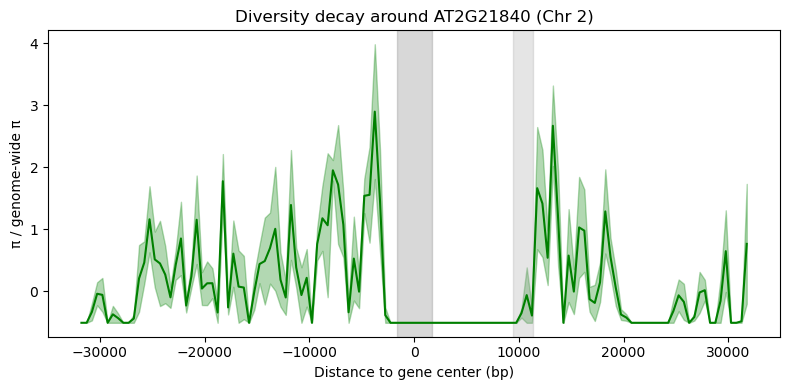

In [61]:
chrom = 2
gene_start = 9307024
gene_end = 9310358


# Filter region: ±5kb around gene
region_df = pi_df[(pi_df['chrom'] == chrom) & (pi_df['window_start'] >= gene_start - 30000) & (pi_df['window_start'] <= gene_end + 30000)]


region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2



gene_center = (gene_start + gene_end) // 2

# Add distance from gene center
region_df['distance'] = region_df['pos'] - gene_center

# Bin data for SEM calculation
region_df['bin'] = pd.cut(region_df['distance'], bins=np.arange(-100000, 100001, 500))
binned = region_df.groupby('bin')['pi_z'].agg(['mean', 'sem']).reset_index()
binned['center'] = binned['bin'].apply(lambda x: x.mid)


# Plot
plt.figure(figsize=(8, 4))
plt.plot(binned['center'], binned['mean'], color='green', label='Mean π (normalized)')
plt.fill_between(binned['center'], binned['mean'] - binned['sem'], binned['mean'] + binned['sem'],
                 alpha=0.3, color='green', label='±1 SEM')

# Gene positions
gene1_start, gene1_end = 9307024, 9310358
gene2_start, gene2_end = 9318122, 9320024
gene1_center = (gene1_start + gene1_end) // 2

# Add gene spans using same reference point
plt.axvspan(gene1_start - gene1_center, gene1_end - gene1_center, color='grey', alpha=0.3)
plt.axvspan(gene2_start - gene1_center, gene2_end - gene1_center, color='darkgrey', alpha=0.3)

# Add labels on top of the shaded boxes
plt.text((gene1_start + gene1_end) / 2 - gene1_center, max(binned['mean']) * 1.05, 'AT2G21840',
         ha='center', va='bottom', fontsize=8, color='black')
plt.text((gene2_start + gene2_end) / 2 - gene1_center, max(binned['mean']) * 0.7, 'AT2G21860',
         ha='center', va='bottom', fontsize=8, color='black')

# Final plot settings
plt.xlabel('Distance to gene center (bp)')
plt.ylabel('π / genome-wide π')
plt.title('Diversity decay around AT2G21840 (Chr 2)')
plt.tight_layout()
plt.show()


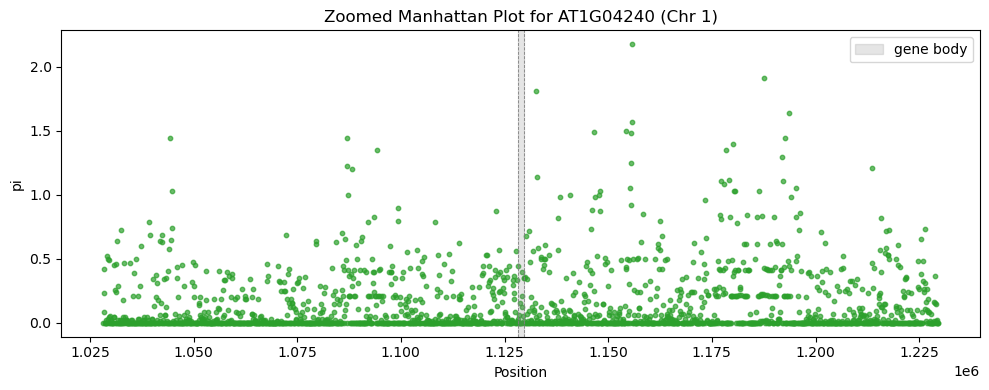

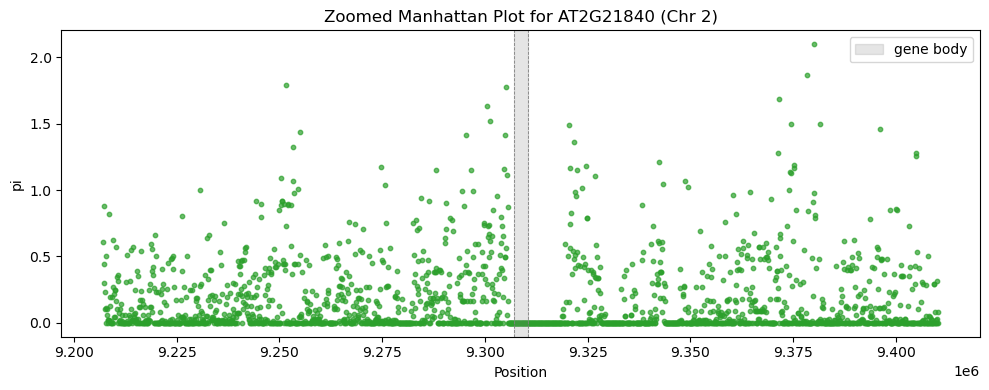

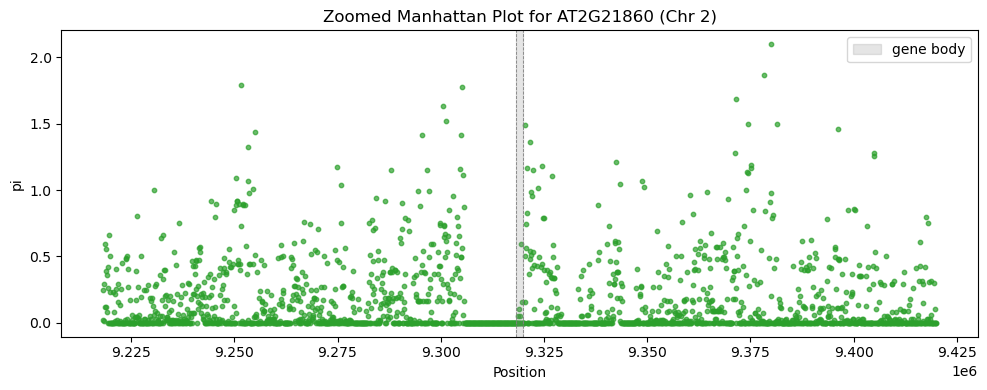

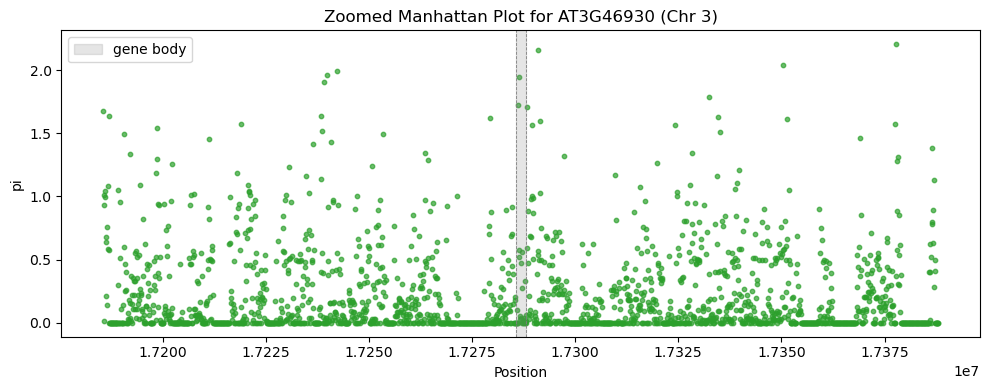

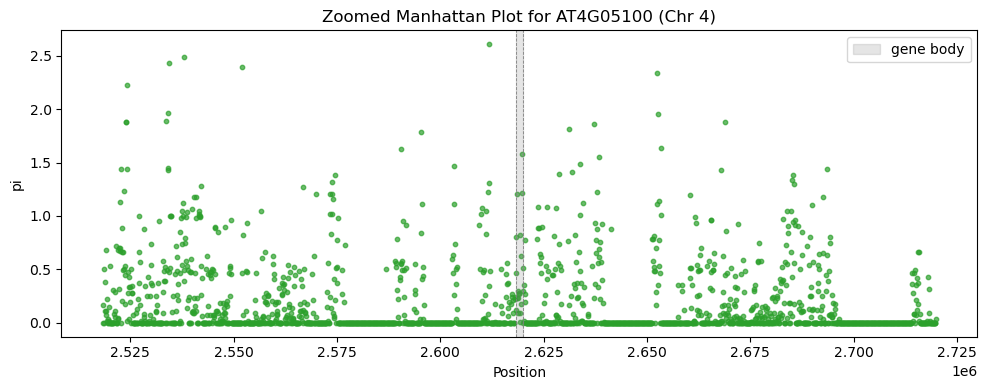

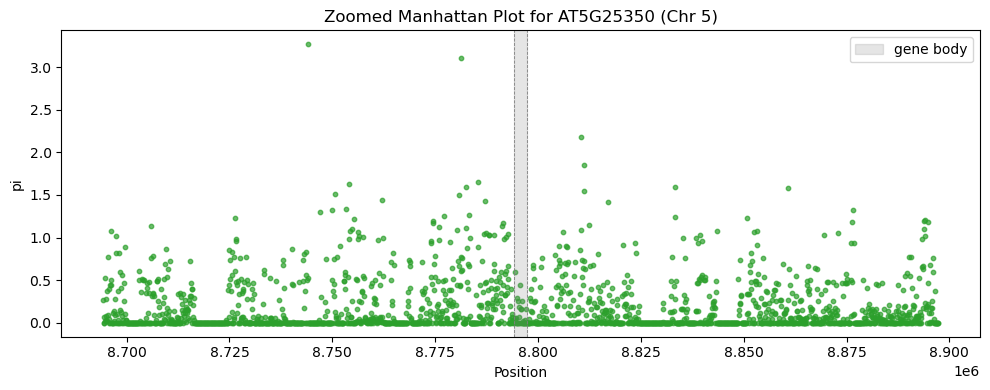

In [55]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['window_start'] >= gene_start - 100000) & (df['window_start'] <= gene_end + 100000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['window_start'], region_df['pi'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('pi')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [47]:
df = pi_df.copy()

In [48]:
df.dtypes

window_start      int64
window_end        int64
pi              float64
chrom             int64
pos_cum         float64
dtype: object

In [49]:
pi_df

,window_start,window_end,pi,chrom,pos_cum
885325,1,100,0.000000,1,1.0
885326,101,200,0.000000,1,101.0
885327,201,300,0.000000,1,201.0
885328,301,400,0.594052,1,301.0
885329,401,500,0.181326,1,401.0
...,...,...,...,...,...
267903,26790301,26790400,0.072643,5,118950301.0
267904,26790401,26790500,0.932340,5,118950401.0
267905,26790501,26790600,0.000000,5,118950501.0
267906,26790601,26790700,0.000000,5,118950601.0


In [148]:
chrom

2

In [50]:
gene_center = (gene_start + gene_ends) // 2

# Subset just the chromosome
subset = df[df['chrom'] == chrom]

# Get the index of the nearest position
nearest_idx = (subset['pos_cum'] - gene_center).abs().idxmin()

# Retrieve the corresponding pos_cum
gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']


In [51]:
gene_pos_cum

1128901.0

In [52]:
gene_df.dtypes


gene_id    object
chrom       int64
start       int64
end         int64
length      int64
dtype: object

In [53]:
df.dtypes

window_start      int64
window_end        int64
pi              float64
chrom             int64
pos_cum         float64
dtype: object

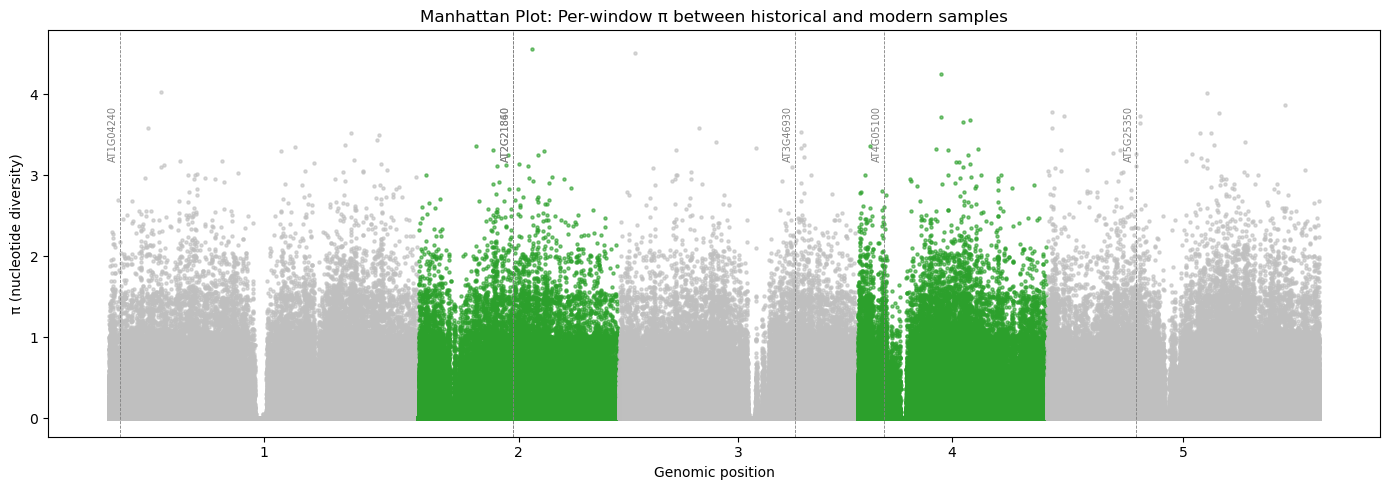

In [54]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

# Scatter plot of pi by chromosome
for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['pi'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')
plt.legend().remove()

# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('π (nucleotide diversity)')
plt.title('Manhattan Plot: Per-window π between historical and modern samples')
plt.tight_layout()

# Annotate gene locations
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    # Compute gene center
    gene_center = (gene_start + gene_ends) // 2

    # Subset df by chromosome
    subset = df[df['chrom'] == chrom]

    # Find the nearest position to the gene center
    nearest_idx = (subset['window_start'] - gene_center).abs().idxmin()
    gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']

    # Plot vertical line at gene
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['pi'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()


In [163]:
pi_df

,window_start,window_end,pi,chrom,pos_cum
885325,1,100,0.000000,1,1.0
885326,101,200,0.000000,1,101.0
885327,201,300,0.000000,1,201.0
885328,301,400,0.594052,1,301.0
885329,401,500,0.181326,1,401.0
...,...,...,...,...,...
453748,26790301,26790400,0.072643,5,118950301.0
453749,26790401,26790500,0.932340,5,118950401.0
453750,26790501,26790600,0.000000,5,118950501.0
453751,26790601,26790700,0.000000,5,118950601.0


In [164]:
from scipy.stats import zscore
pi_df['pi_z'] = zscore(pi_df['pi'])

In [167]:
df = pi_df.copy()

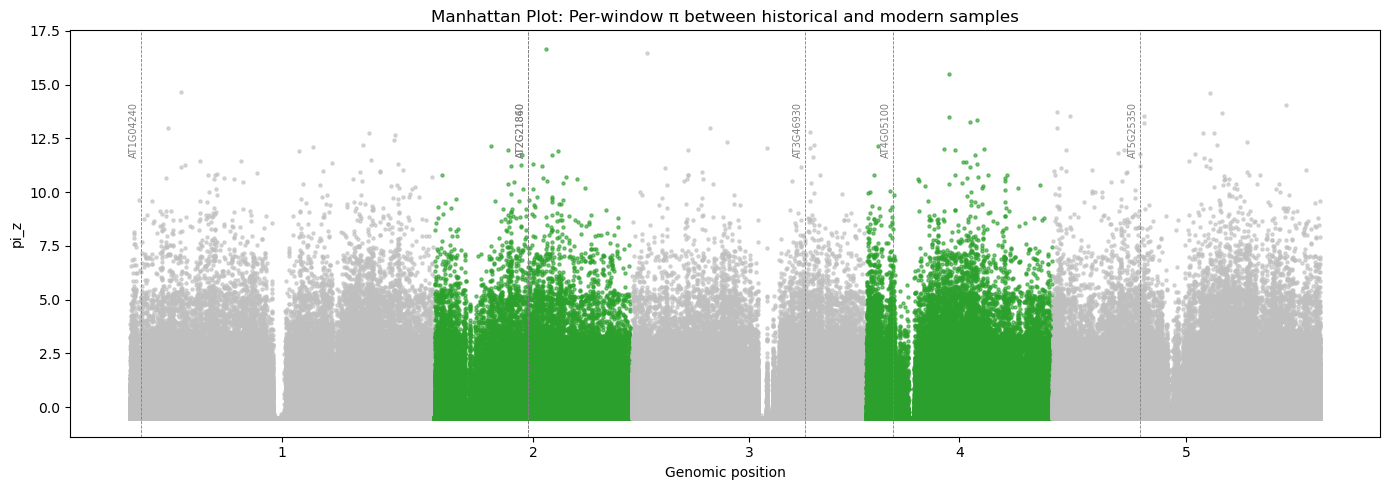

In [170]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

# Scatter plot of pi_z by chromosome
for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['pi_z'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')
plt.legend().remove()

# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('pi_z')
plt.title('Manhattan Plot: Per-window π between historical and modern samples')
plt.tight_layout()

# Annotate gene locations
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    # Compute gene center
    gene_center = (gene_start + gene_ends) // 2

    # Subset df by chromosome
    subset = df[df['chrom'] == chrom]

    # Find the nearest position to the gene center
    nearest_idx = (subset['window_start'] - gene_center).abs().idxmin()
    gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']

    # Plot vertical line at gene
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['pi_z'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()


In [169]:
pi_df

,window_start,window_end,pi,chrom,pos_cum,pi_z
885325,1,100,0.000000,1,1.0,-0.510376
885326,101,200,0.000000,1,101.0,-0.510376
885327,201,300,0.000000,1,201.0,-0.510376
885328,301,400,0.594052,1,301.0,1.725342
885329,401,500,0.181326,1,401.0,0.172046
...,...,...,...,...,...,...
453748,26790301,26790400,0.072643,5,118950301.0,-0.236985
453749,26790401,26790500,0.932340,5,118950401.0,2.998491
453750,26790501,26790600,0.000000,5,118950501.0,-0.510376
453751,26790601,26790700,0.000000,5,118950601.0,-0.510376


In [156]:
nearest_idx

185845

In [160]:
subset.loc[nearest_idx]['pos_cum']

window_start           1.0
window_end           100.0
pi                     0.0
chrom                  5.0
pos_cum         92160001.0
Name: 185845, dtype: float64

In [157]:
subset.loc[nearest_idx, 'pos_cum']

92160001.0

In [159]:
df[df['pos_cum'] == 92160001.0]

,window_start,window_end,pi,chrom,pos_cum
185845,1,100,0.0,5,92160001.0


In [161]:
subset['pos_cum'] - gene_center).abs().idxmin()

SyntaxError: unmatched ')' (1492994867.py, line 1)